<a href="https://colab.research.google.com/github/Dukzf1v/AIO_Exercises/blob/main/M04W03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  ones_column = np.ones((features_X.shape[0], 1))
  features_X = np.hstack((ones_column, features_X))

  return features_X, sales_Y


In [17]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [18]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [27]:
#Question 4
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual (n = 4, bound = 10):
  individual  = []
  for i in range(n):
    individual.append(generate_random_value(bound))

  return individual

individual = create_individual()
print(individual)


[2.9940257408102102, 4.872592010330129, 0.3256363408852714, 2.0517225422126972]


In [30]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 1/(loss+1)
  return fitness_value

In [31]:
#Question 5
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [34]:
def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()

  if random.random() < crossover_rate:
    crossover_point = random.randint(1, len(individual1) -1)
    individual1_new[crossover_point:] = individual2[crossover_point:]
    individual2_new[crossover_point:] = individual1[crossover_point:]

  return individual1_new, individual2_new

In [44]:
#Question 5
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print ("individual1 : " , individual1 )
print ("individual2 : " , individual2 )

individual1 :  [4.09, 4.82, -0.79, -2.41]
individual2 :  [3.44, 2.57, 3.1, 4.02]


In [45]:
def mutate(individual, mutation_rate = 0.05):
  individual_new = individual.copy()
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_new[i] = generate_random_value()
  return individual_new

In [46]:
#Question 6
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [48]:
def initializePopulation ( m ) :
  population = [ create_individual() for _ in range ( m ) ]
  return population

In [49]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [54]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)
        # crossover
        individual1_new, individual2_new = crossover(individual1, individual2)
        # mutation
        mutate(individual1_new)
        mutate(individual2_new)
        # add to new population
        new_population.append(individual1_new)
        new_population.append(individual2_new)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
         new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [55]:
#Question 7
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [individual1 , individual2]
new_population , _ = create_new_population( old_population , elitism =2 , gen =1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [66]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
  return losses_list

In [67]:
losses_list = run_GA()

Best loss: 780.9271962600042 with chromsome:  [1.8041981133777918, 0.028902055380638503, 0.04399825877917318, 0.9147082191231382]
Best loss: 570.645535341661 with chromsome:  [1.8041981133777918, 0.028902055380638503, 0.04399825877917318, 0.8042559409442895]
Best loss: 44.70636556921845 with chromsome:  [-1.2887249519918986, 0.10505725915842534, -0.20840046667258583, 0.12643887178150348]
Best loss: 44.70636556921845 with chromsome:  [-1.2887249519918986, 0.10505725915842534, -0.20840046667258583, 0.12643887178150348]
Best loss: 44.70636556921845 with chromsome:  [-1.2887249519918986, 0.10505725915842534, -0.20840046667258583, 0.12643887178150348]
Best loss: 44.70636556921845 with chromsome:  [-1.2887249519918986, 0.10505725915842534, -0.20840046667258583, 0.12643887178150348]
Best loss: 40.4033931647453 with chromsome:  [-2.862390006647929, 0.10395038984670646, 0.054675471354173055, -0.08394629745054671]
Best loss: 32.43132341894442 with chromsome:  [-1.6960341960465875, 0.103950389846

Best loss: 681.8702128179378 with chromsome:  [2.8197821273400816, 0.29072278235712457, -0.2215326032386955, -0.39862230705936974]
Best loss: 574.8482406942524 with chromsome:  [-2.2406250202565126, 0.29072278235712457, -0.2215326032386955, -0.39862230705936974]
Best loss: 74.81339570970258 with chromsome:  [-4.571843561615122, 0.012667836176161185, 0.28411273211649823, 0.2841055900510492]
Best loss: 68.31515768567364 with chromsome:  [-1.9827250147969089, 0.012667836176161185, 0.28411273211649823, 0.2841055900510492]
Best loss: 68.31515768567364 with chromsome:  [-1.9827250147969089, 0.012667836176161185, 0.28411273211649823, 0.2841055900510492]
Best loss: 39.36705097119688 with chromsome:  [-4.321948481646535, 0.08464250414397578, 0.28411273211649823, 0.11806784081534794]
Best loss: 39.36705097119688 with chromsome:  [-4.321948481646535, 0.08464250414397578, 0.28411273211649823, 0.11806784081534794]
Best loss: 39.36705097119688 with chromsome:  [-4.321948481646535, 0.0846425041439757

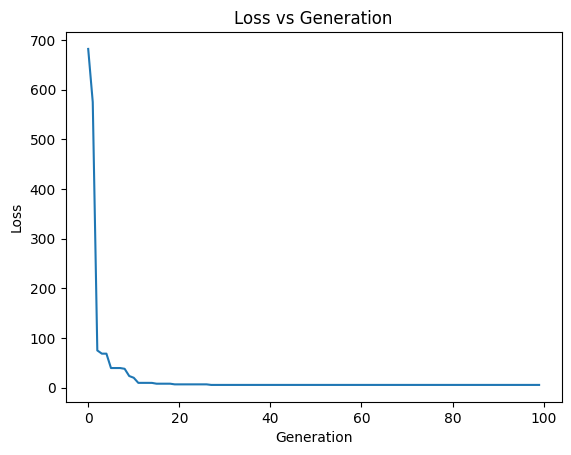

In [68]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      plt.plot(losses_list)
      plt.xlabel("Generation")
      plt.ylabel("Loss")
      plt.title("Loss vs Generation")
      plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[1.7210590789988123, 0.06607034205432627, 0.20492229032713083, -0.03955018727481607]


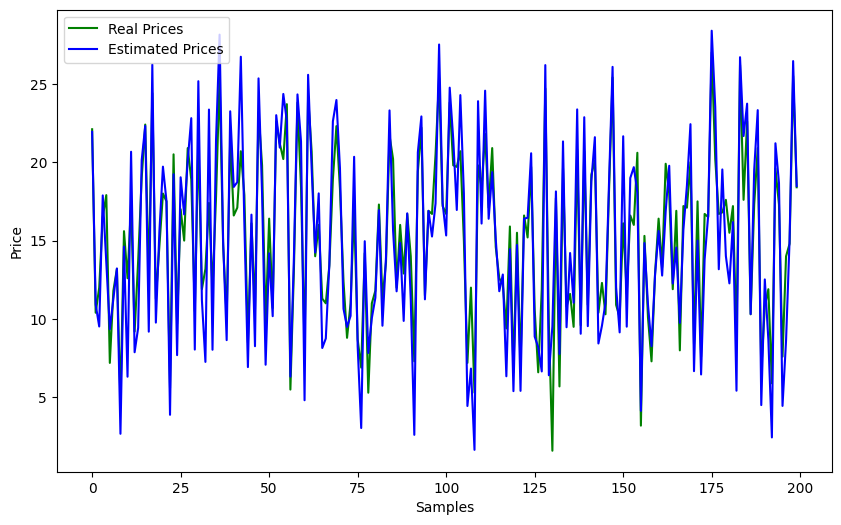

In [69]:
def visualize_predict_gt(population):
    # Visualization of ground truth and predicted values
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    # Calculate estimated prices for all samples
    estimated_prices = features_X.dot(theta)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

# Call the visualization function after creating the new population
visualize_predict_gt(population)


[1.7210590789988123, 0.06607034205432627, 0.20492229032713083, -0.03955018727481607]


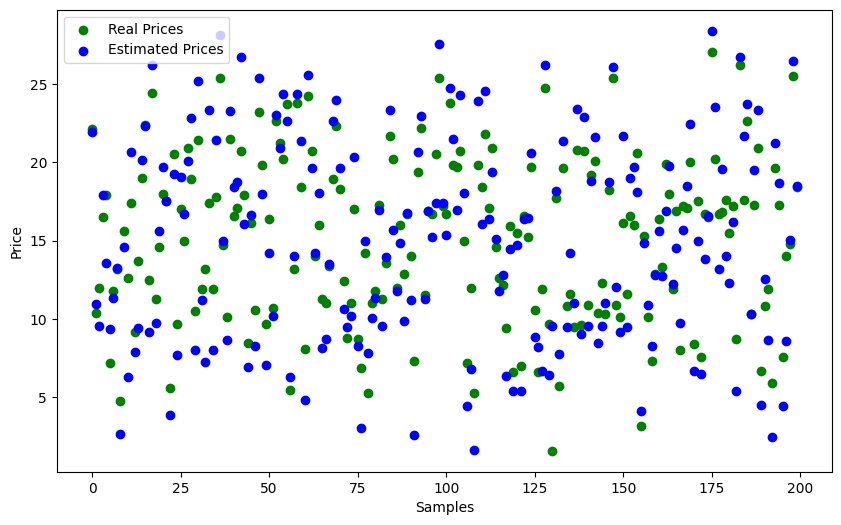

In [71]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()